# Implementation a Unet structue for semantic segmentation

In [2]:
import numpy as np
import pandas as pd
from utils import load_data, train_val_split, plot_sample, plot_prediection_sample
from model import UnetBrain

# import crash_on_ipy
import sys

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


Using TensorFlow backend.


In [3]:
# load data
train_data = load_data('./machine_learning_challenge/train_data.csv')
train_label = load_data('./machine_learning_challenge/train_label.csv')
test_data = load_data('./machine_learning_challenge/test_data.csv')
test_label = load_data('./machine_learning_challenge/test_label.csv')

X_train, y_train, X_val, y_val = train_val_split(train_data, train_label, val_size=0.20)

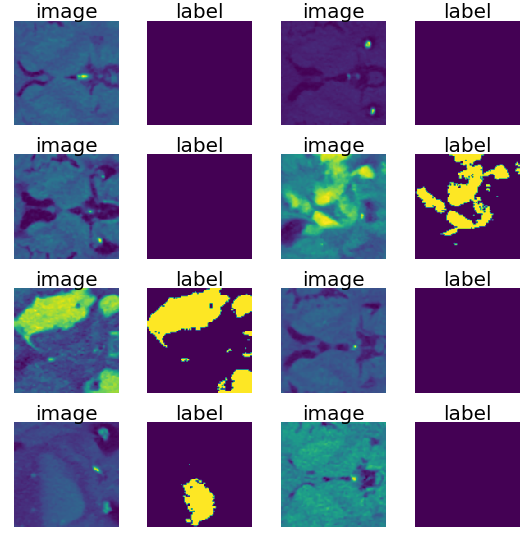

In [4]:
# sample plot
plot_sample(X_train, y_train)

In [4]:
# input parameters for unet model
params = {}
params['learning_rate'] = 0.000001
params['learning_decay'] = 0.95
params['num_filters'] = 16
params['kernel_size'] = 3
params['pooling_size'] = 2
params['dropout'] = 0.1
params['batch_norm']= True
params['image_size'] = 128

In [5]:
# unet model and some parameters
unet_model = UnetBrain(**params).model
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0000001, verbose=1),
    ModelCheckpoint('model-UnetBrain.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Train model

In [6]:
# train the model 
results = unet_model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=callbacks,\
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 107 samples, validate on 27 samples
Epoch 1/150
107/107 [==============================] - 29s 269ms/step - loss: 0.7083 - jaccard_discance: 0.4904 - val_loss: 0.6543 - val_jaccard_discance: 0.4739

Epoch 00001: val_loss improved from inf to 0.65427, saving model to model-UnetBrain.h5
Epoch 2/150
107/107 [==============================] - 25s 234ms/step - loss: 0.6023 - jaccard_discance: 0.4315 - val_loss: 0.5687 - val_jaccard_discance: 0.4190

Epoch 00002: val_loss improved from 0.65427 to 0.56865, saving model to model-UnetBrain.h5
Epoch 3/150
107/107 [==============================] - 23s 213ms/step - loss: 0.5048 - jaccard_discance: 0.3688 - val_loss: 0.4411 - val_jaccard_discance: 0.3398

Epoch 00003: val_loss improved from 0.56865 to 0.44109, saving model to model-UnetBrain.h5
Epoch 4/150
107/107 [==============================] - 23s 213ms/step - loss: 0.4493 - jaccard_discance: 0.3356 - val_loss: 0.3563 - val_jaccard_disc

# Plot loss history

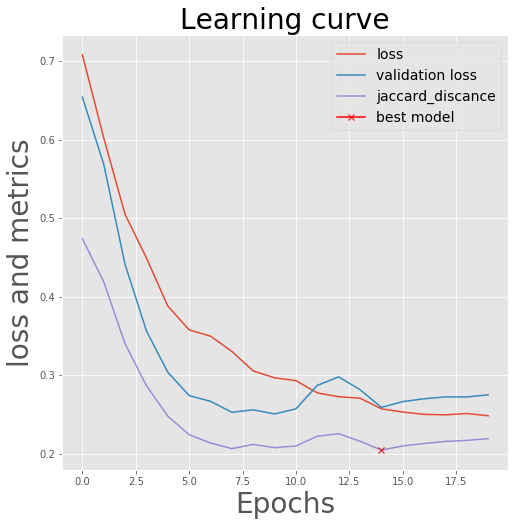

In [7]:
# plot history of loss and metrics
plt.figure(figsize=(8, 8))
plt.title("Learning curve", fontsize=28)
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="validation loss")
plt.plot(results.history["val_jaccard_discance"], label="jaccard_discance")
plt.plot( np.argmin(results.history["val_jaccard_discance"]), np.min(results.history["val_jaccard_discance"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs", fontsize=28)
plt.ylabel("loss and metrics", fontsize=28)

plt.legend(fontsize=14)
plt.show()


# Show example predictions

In [6]:
# use trained model on test data
# load the model parameters
unet_model.load_weights('model-UnetBrain.h5')
pred_test = unet_model.predict(test_data)

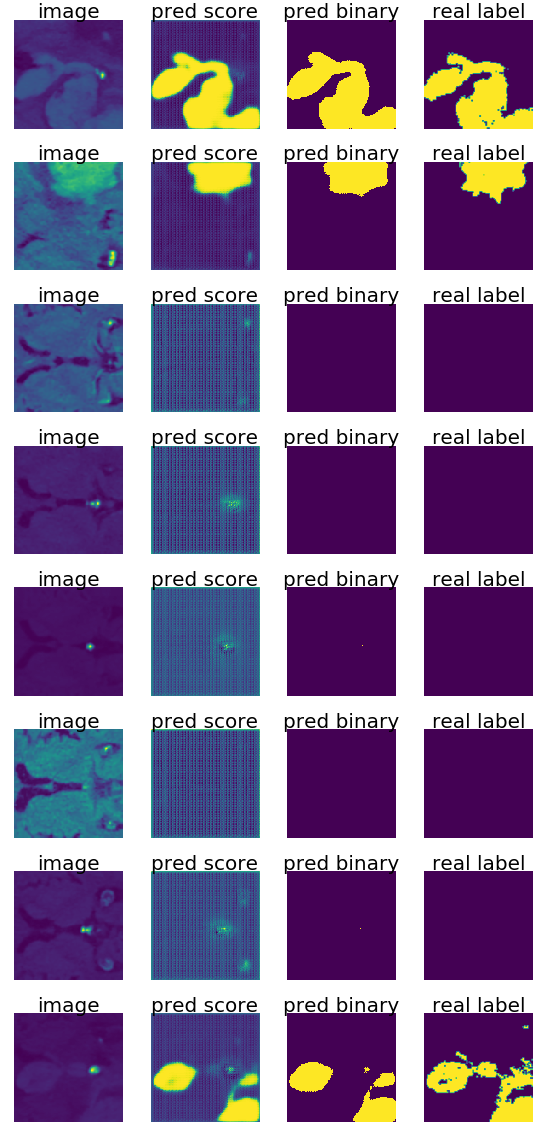

In [7]:
# example plot of prediction result
plot_prediection_sample(test_data, test_label, pred_test)